<a href="https://colab.research.google.com/github/The-DarK-os/Neural-networks/blob/main/pneumonia-prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files 
files.upload()  

Saving kaggle (2).json to kaggle (2).json


{'kaggle (2).json': b'{"username":"nocopyrights","key":"ac68f60350a16ff8a17b787ea6e46a58"}'}

In [ ]:
#rename the kaggle..json file to kaggle.json
!mv kaggle.json /root/.kaggle/


In [ ]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia 

100% 2.29G/2.29G [00:30<00:00, 23.7MB/s]



In [ ]:
import zipfile 
with zipfile.ZipFile("chest-xray-pneumonia.zip") as zip_ref:
  zip_ref.extractall()

In [5]:
import os
import numpy as   np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
import seaborn as sns
%matplotlib inline

In [6]:
main_data = "chest_xray/"
train_dir = "train/"
test_dir = "test/"
val_dir = "val/"

normal_dir = "NORMAL/"
pneumonia_dir = "PNEUMONIA/"

train_path = os.path.join(main_data,train_dir)
test_path = os.path.join(main_data,test_dir)
val_path = os.path.join(main_data,val_dir)

normal_train_path = os.path.join(train_path,normal_dir)
pneumonia_train_path = os.path.join(train_path,pneumonia_dir)

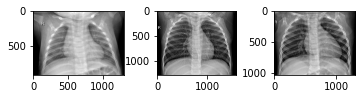

In [7]:
normal_train_images = os.listdir(normal_train_path)
pneumonia_train_images = os.listdir(pneumonia_train_path)

for i in range(0,3):
  plt.subplot(1+330+i)
  images = plt.imread(normal_train_path + normal_train_images[i])
  plt.imshow(images,cmap="gray")

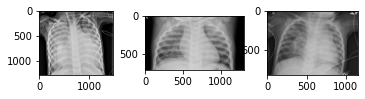

In [8]:
for i in range(0,3):
  plt.subplot(1+330+i)
  images = plt.imread(pneumonia_train_path+pneumonia_train_images[i])
  plt.imshow(images,cmap="gray")

In [9]:
each_normal_path = []
for normal_imgs in normal_train_images:
  each_normal_path.append(train_path+normal_dir + normal_imgs)

each_pneumonia_path = []
for pneumonia_imgs in pneumonia_train_images:
  each_pneumonia_path.append(train_path+pneumonia_dir +  pneumonia_imgs)

In [10]:
sample_normal_image = plt.imread(each_normal_path[0])
pneumonia_normal_image = plt.imread(each_pneumonia_path[0])
print(sample_normal_image.shape)
print(pneumonia_normal_image.shape)

(920, 1306)
(1288, 1488)


In [11]:
height = []
width = []

for i in range(0,len(each_normal_path)):
  img = plt.imread(each_normal_path[i])
  height.append(img.shape[0])
  width.append(img.shape[1])

In [12]:
print(np.mean(height))
print(np.mean(width))

1381.4310216256524
1667.7345264727815


In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(rescale = 1/255.,
                               rotation_range = 0.2,
                               )
test_gen = ImageDataGenerator(rescale = 1/255.,
                              )
val_gen = ImageDataGenerator(rescale = 1/255.,
                             validation_split = 0.1,)


In [14]:
target_size = (1381,1667)
train_path = main_data + train_dir
test_path = main_data + test_dir
val_path = main_data + val_dir
train = train_gen.flow_from_directory(directory=train_path,
                                      target_size=target_size,
                                      batch_size=32,
                                      color_mode="grayscale")

val = val_gen.flow_from_directory(directory=val_path,
                                  target_size=target_size,
                                  batch_size=32,
                                  color_mode="grayscale")

test = test_gen.flow_from_directory(directory=test_path,
                                    target_size=target_size,
                                    batch_size=1,
                                    color_mode="grayscale")

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,BatchNormalization,Dropout,Flatten

model = Sequential()
model.add(Conv2D(filters=10 , kernel_size=(7,7) , activation = "relu",padding = "same",input_shape = (1381,1667,1)))
# model.add(Conv2D(filters=10,kernel_size=(7,7),activation = "relu",padding ="same"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(3,3)))
model.add(Dropout(0.5))

# model.add(Conv2D(filters=20,kernel_size=(7,7),activation="relu",padding="same"))
# model.add(Conv2D(filters=20,kernel_size=(7,7),activation="relu",padding="same"))
# model.add(BatchNormalization())
# model.add(MaxPool2D(pool_size=(3,3)))
# model.add(Dropout(0.5))

model.add(Conv2D(filters=80,kernel_size=(7,7),activation="relu",padding="same"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(3,3)))
model.add(Dropout(0.5))

model.add(Conv2D(filters=160,kernel_size=(7,7),activation="relu",padding="same"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(3,3)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(2,activation="softmax"))

In [18]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy

opt = Adam(learning_rate=0.001 , decay = 1e-5)
loss = CategoricalCrossentropy()

model.compile(loss=loss,optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 1381, 1667, 10)    500       
_________________________________________________________________
batch_normalization_8 (Batch (None, 1381, 1667, 10)    40        
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 460, 555, 10)      0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 460, 555, 10)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 460, 555, 80)      39280     
_________________________________________________________________
batch_normalization_9 (Batch (None, 460, 555, 80)      320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 153, 185, 80)     

In [ ]:
history = model.fit(train,epochs=30,validation_data=val)  

Epoch 1/30
